<a href="https://colab.research.google.com/github/HafizAQ/Python-Practices/blob/main/FourierTerms_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://python.plainenglish.io/understanding-fourier-terms-for-seasonality-in-time-series-analysis-a43b4ddbfd9e

#Fourier Terms & Time Series Analysis

Seasonality (Recurring patterns or cycles in data)

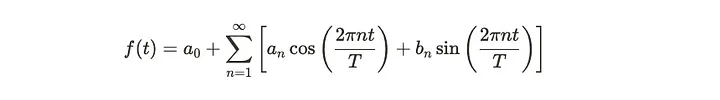


**Incorporation into Regression Models**

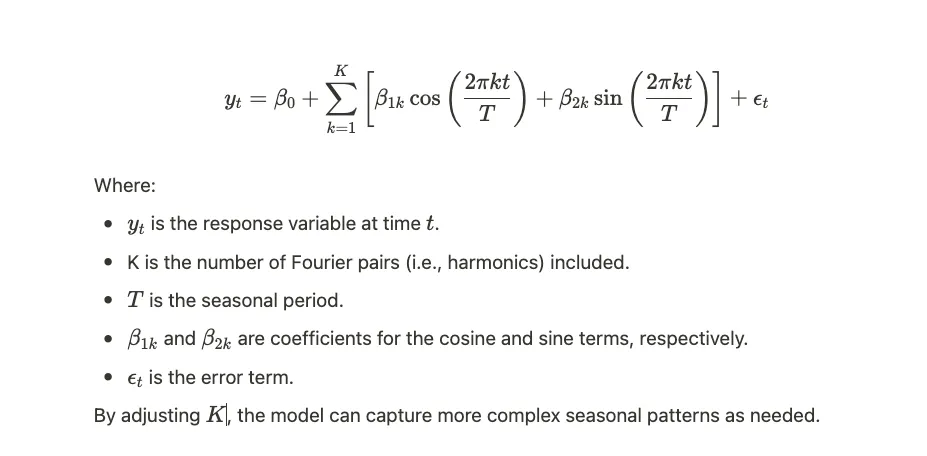


In [1]:
import numpy as np
import pandas as pd

def generate_fourier_terms(time, period, K):
    """
    Generate Fourier terms for a given time series.

    Parameters:
    - time: array-like, time index
    - period: int, seasonal period
    - K: int, number of harmonics

    Returns:
    - DataFrame containing sine and cosine terms
    """
    fourier_terms = {}
    for k in range(1, K + 1):
        fourier_terms[f'sin_{k}'] = np.sin(2 * np.pi * k * time / period)
        fourier_terms[f'cos_{k}'] = np.cos(2 * np.pi * k * time / period)
    return pd.DataFrame(fourier_terms)

# Example usage
# Suppose we have 24 months of data
time = np.arange(1, 25)
period = 12
K = 2  # Number of harmonics

fourier_df = generate_fourier_terms(time, period, K)
print(fourier_df.head())

      sin_1         cos_1         sin_2  cos_2
0  0.500000  8.660254e-01  8.660254e-01    0.5
1  0.866025  5.000000e-01  8.660254e-01   -0.5
2  1.000000  6.123234e-17  1.224647e-16   -1.0
3  0.866025 -5.000000e-01 -8.660254e-01   -0.5
4  0.500000 -8.660254e-01 -8.660254e-01    0.5


In [3]:
#Incorporating Fourier Terms into a Time Series Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic time series data with seasonality
np.random.seed(42)
time = np.arange(1, 121)  # 10 years of monthly data
period = 12
K = 3  # Number of harmonics
noise = np.random.normal(0, 0.5, size=len(time))
seasonality = (
    10 +
    3 * np.sin(2 * np.pi * time / period) +
    2 * np.sin(2 * np.pi * 2 * time / period) +
    1.5 * np.cos(2 * np.pi * 3 * time / period)
)
y = seasonality + noise

# Generate Fourier terms
fourier_terms = generate_fourier_terms(time, period, K)

# Create a DataFrame
df = pd.DataFrame({
    'y': y,
    'time': time
}).join(fourier_terms)

# Add a constant term for the intercept
X = sm.add_constant(df[fourier_terms.columns])
model = sm.OLS(df['y'], X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     712.9
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.51e-87
Time:                        19:13:36   Log-Likelihood:                -72.183
No. Observations:                 120   AIC:                             158.4
Df Residuals:                     113   BIC:                             177.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9604      0.042    239.781      0.0

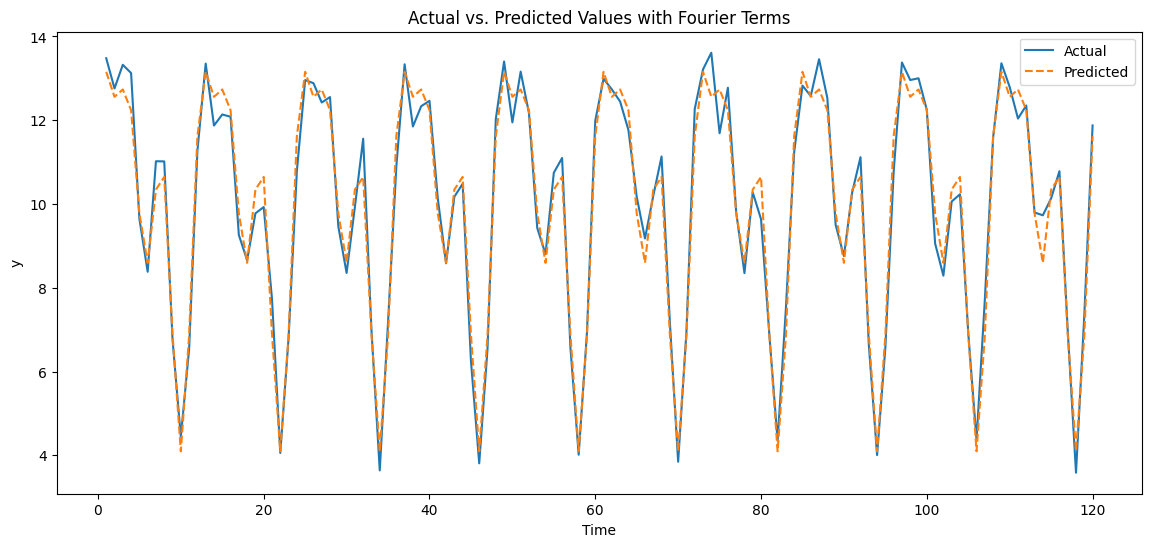

In [4]:
#Interpreting the Model

# Predict values using the model
df['y_pred'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['y'], label='Actual')
plt.plot(df['time'], df['y_pred'], label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Actual vs. Predicted Values with Fourier Terms')
plt.legend()
plt.show()